# Data Processing and Cleaning

Importing libraries needed for cleaning

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab

from scipy import stats

import warnings 
warnings.filterwarnings('ignore')
# Used to supressed the warnings

In [2]:
data=pd.read_csv("auto_imports.csv")

#As there are no column names , need to give it according to the desciption
columns = [
    'symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
    'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
    'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
    'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
    'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
    'highway_mpg', 'price'
]

#Assigning the dataframe with column names
data.columns=columns

## Distribution of numerical features

In [3]:
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
data.index=data.index+1
data.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


Since some of the features are numerical and yet they are in categorical in the dataframe we will convert them into numerical

In [5]:
data = data.replace('?', np.nan)

# Convert the specified columns to numeric values
def convert_cat_to_numeric(df,columns):    
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')  

convert_cat_to_numeric(data,['normalized_losses','bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm'])


In [6]:
data.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,200.000000,164.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,196.000000,196.000000,200.000000,198.000000,198.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,3.330000,3.259847,10.170100,103.358586,5118.181818,25.200000,30.705000,13205.690000
std,1.248557,35.442168,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,0.271303,0.317383,4.014163,37.645120,481.666657,6.432487,6.827227,7966.982558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000
75%,2.000000,150.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


## Description of  the features of the given data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       198 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

* **Symboling**: Represents the risk rating of a vehicle, ranging from highly risky (-3) to extremely safe (3).
* **Normalized-losses**: A continuous variable indicating the average loss payment per insured vehicle year.
* **Make**: Various automobile manufacturers or brands producing cars in the dataset.
* **Fuel-type**: Differentiates between diesel and gas-powered vehicles.
* **Aspiration**: Indicates whether the car is standard or turbocharged.
* **Num-of-doors**: Specifies the number of doors a car has, either two or four.
* **Body-style**: Describes the general body configuration of the vehicle.
* **Drive-wheels**: Refers to the type of wheels the vehicle is powered by (4wd, fwd, rwd).
* **Engine-location**: Specifies whether the engine is located in the front or rear of the vehicle.
* **Wheel-base**: The distance between the centers of the front and rear wheels of a vehicle.
* **Length**: Continuous measurement describing the physical length of the vehicle.
* **Width**: Continuous measurement describing the physical width of the vehicle.
* **Height**: Continuous measurement describing the physical height of the vehicle.
* **Curb-weight**: The weight of a vehicle without any occupants or baggage.
* **Engine-type**: Describes the internal combustion engine configuration.
* **Num-of-cylinders**: Specifies the number of cylinders in the vehicle's engine.
* **Engine-size**: The volume of the engine displacement measured in cubic centimeters (cc) or cubic inches (CID).
* **Fuel-system**: The method used to deliver fuel to the engine for combustion.
* **Bore**: Continuous measurement representing the diameter of the engine cylinders.
* **Stroke**: Continuous measurement representing the length of the piston stroke in the engine.
* **Compression-ratio**: The ratio of the volume of the combustion chamber when the piston is at the bottom to when it's at the top.
* **Horsepower**: The power output of the engine measured in horsepower (hp).
* **Peak-rpm**: The maximum revolutions per minute (RPM) the engine can achieve under full throttle.
* **City-mpg**: Measure of the vehicle's fuel efficiency in miles per gallon (mpg) for city driving.
* **Highway-mpg**: Measure of the vehicle's fuel efficiency in miles per gallon (mpg) for highway driving.
* **Price**: The manufacturer's suggested retail price (MSRP) of the vehicle.

## Data Cleaning

In [8]:
data.isna().sum()

symboling             0
normalized_losses    36
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

There are 36 values which are NaN in the normalised losses.

As there are similar car which are has same model, fuel-type,engine,body style and engine location.

The rest all columns which have NaN values can be replaced with mean based on the description


In [9]:
mean_normalized_losses_whole = data['normalized_losses'].mean()

# Define a function to fill NaN values in 'normalized-losses' based on similarity
def fill_normalized_losses(row):
    # Filter rows with the same 'make,' 'fuel-type,' 'aspiration,' 'body-style,' and 'drive-wheels'
    similar_rows = data[(data['make'] == row['make']) & 
                       (data['fuel_type'] == row['fuel_type']) & 
                       (data['aspiration'] == row['aspiration']) & 
                       (data['body_style'] == row['body_style']) & 
                       (data['drive_wheels'] == row['drive_wheels'])]
    
    # Check if the 'normalized-losses' column in similar_rows contains NaN values
    if similar_rows['normalized_losses'].isna().all():
        # If all values are NaN in similar_rows, replace with the mean of the whole dataset
        return str(mean_normalized_losses_whole)
    
    # Calculate the mean of 'normalized-losses' for similar rows
    mean_normalized_losses = similar_rows['normalized_losses'].mean()
    
    if not pd.isna(mean_normalized_losses):
        return str(mean_normalized_losses)  # Convert the result to a string
    else:
        # If no similar rows are found or they also have NaN values, return the original value as a string
        return str(row['normalized_losses'])

# Apply the fill_normalized_losses function to replace NaN values in 'normalized-losses'
data['normalized_losses'] = data.apply(lambda row: fill_normalized_losses(row) if pd.isna(row['normalized_losses']) else str(row['normalized_losses']), axis=1)

In [10]:
data.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [11]:
similarity_columns = ['make', 'fuel_type', 'aspiration', 'body_style', 'engine_location']

# Define the columns to fill NaN values
columns_to_fill = ['bore', 'stroke', 'horsepower', 'peak_rpm']

# Group the DataFrame by similarity columns and calculate the mean for each group
grouped = data.groupby(similarity_columns)[columns_to_fill].transform('mean')

# Fill NaN values in the specified columns with the group-specific mean values
data[columns_to_fill] = data[columns_to_fill].fillna(grouped)

# If any NaN values remain after the group-specific fill, fill them with the mean of that particular column
data= data.fillna(data.mean())

In [12]:
data.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

The num-of-doors is categorical varible hence imputing the value would be difficult , we would try mode imputation

In [13]:
mode_value = data['num_of_doors'].mode()[0]  
data['num_of_doors'] = data['num_of_doors'].fillna(mode_value)

In [14]:
data.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Conversion of number of doors and cylinders into their numerical values, since its just given in word form.


In [15]:
def transform( X, y=None):
    X = X.copy()
    mapping_num_of_doors = pd.Series([2, 4], index=['two', 'four'])
    mapping_num_of_cylinders = pd.Series([2, 3, 4, 5, 6, 8, 12], index=['two', 'three', 'four', 'five', 'six',
                                                                        'eight', 'twelve'])
    X.loc[:, 'num_of_doors'] = X.loc[:, 'num_of_doors'].map(mapping_num_of_doors)
    X.loc[:, 'num_of_cylinders'] = X.loc[:, 'num_of_cylinders'].map(mapping_num_of_cylinders)

    return X


transform(data)


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
5,2,161.0,audi,gas,std,2,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


<Figure size 2000x1800 with 0 Axes>

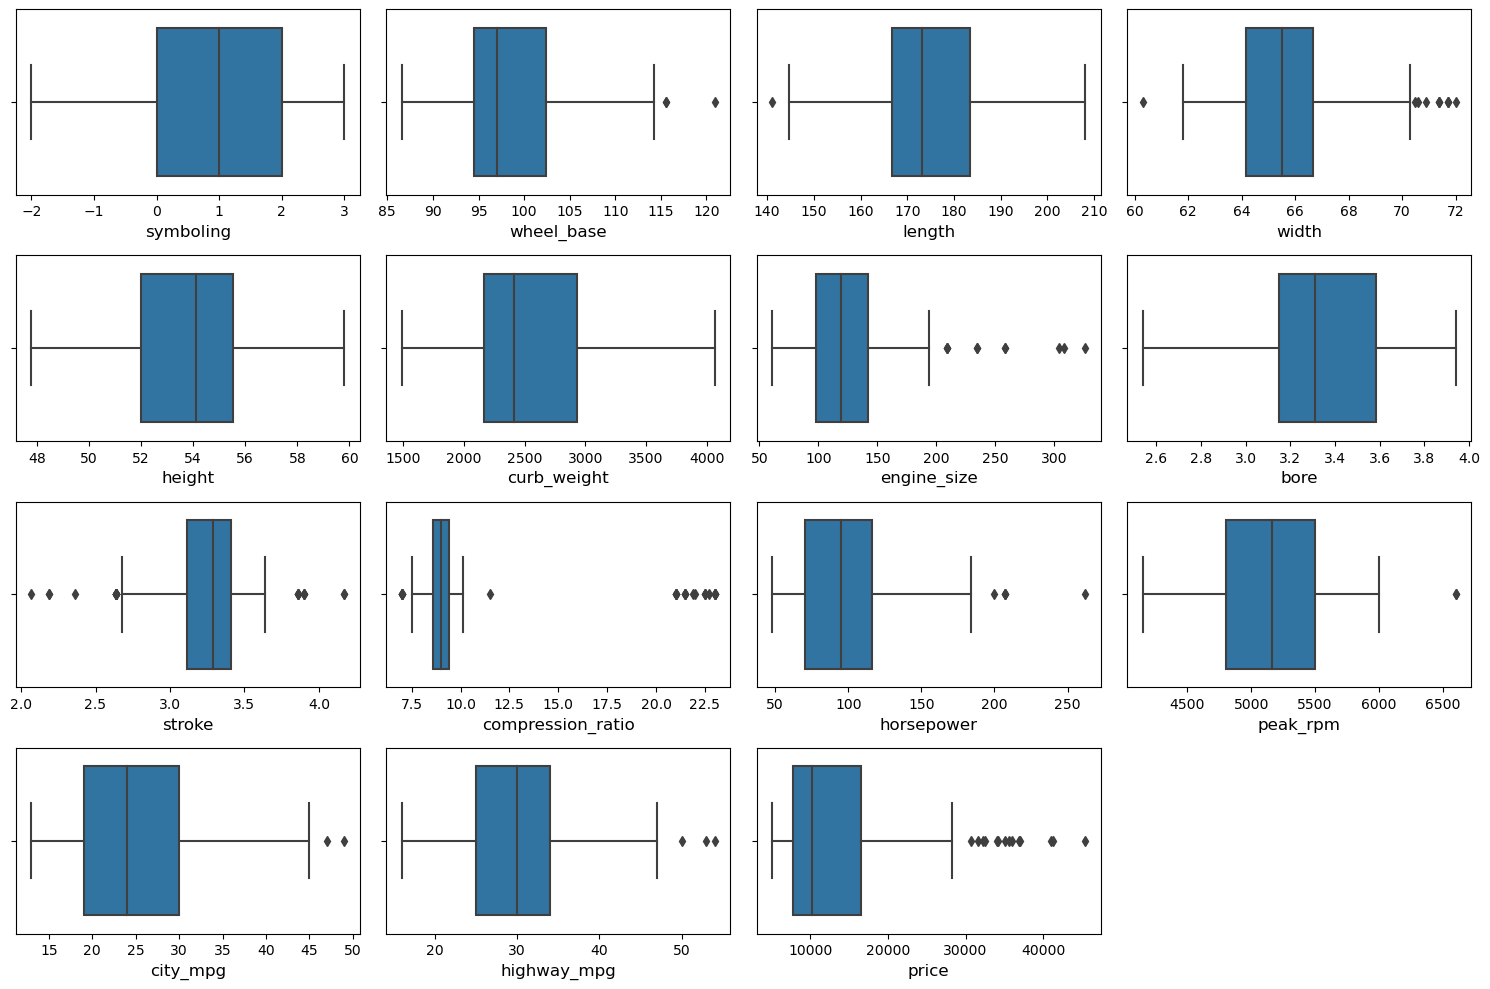

In [16]:
continuous =  data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20, 18))  # Defining canvas size
plotno = 1  # Counter

plt.figure(figsize=(15, 10))

for i, column in enumerate(continuous, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=data[column])
    plt.xlabel(column, fontsize=12)
    plt.tight_layout()

plt.show()

## Data Standardisation

Data is usually collected from different agencies with different formats. (Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)

In [17]:
data["city_L/100km"] = 235 / data["city_mpg"]

data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556
5,2,161.0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250,12.368421


## Data Normalization

Why normalization?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

In [18]:
data["length"] = data["length"]/data["length"].max()
data["width"] = data["width"]/data["width"].max()
data['height'] = data['height']/data['height'].max() 
data[["length","width","height"]].head()

,length,width,height
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
5,0.851994,0.920833,0.887960


Here we can see, we've normalized "length", "width" and "height" in the range of [0,1].

## Binning

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

In [19]:
data["horsepower"] = data["horsepower"].astype(int,copy=True)

Let us save the imputed data into new folder and perform modeling by importing the data into next setion.

Text(0.5, 1.0, 'HORSEPOWER BINS')

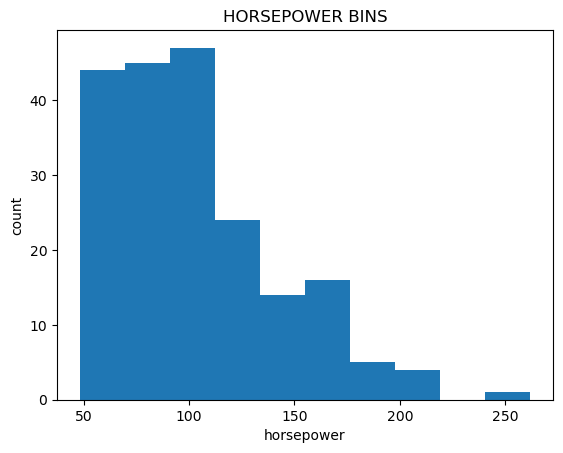

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data["horsepower"])

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("HORSEPOWER BINS")

3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.

In [21]:
bins = np.linspace(min(data["horsepower"]),max(data["horsepower"]),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

We set group names:

In [22]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" the determine what each value of "df['horsepower']" belongs to.

In [23]:
data['horsepower-binned'] = pd.cut(data['horsepower'], bins, labels=group_names ,include_lowest = True)
data[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low
10,101,Low


Lets see the number of vehicles in each bin.


Text(0.5, 1.0, 'horsepower bins')

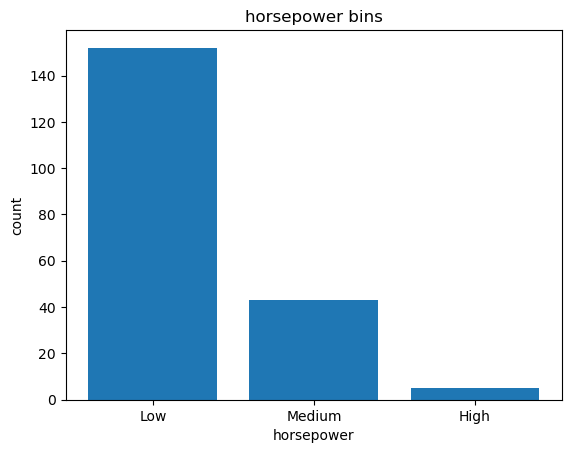

In [24]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, data["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [25]:
data["horsepower-binned"].value_counts()

Low       152
Medium     43
High        5
Name: horsepower-binned, dtype: int64

By checking the dataframe above carefully, we can find that the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High").

We successfully narrow the intervals from 57 to 3!

# Indicator variable (or dummy variable)

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

In [26]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'city_L/100km', 'horsepower-binned'],
      dtype='object')

Save the indicator variables and assign it to data frame "dummy_variable_1"

In [27]:
dummy_variable_1 = pd.get_dummies(data["fuel_type"])
dummy_variable_1.head()

,diesel,gas
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1


Change column names for clarity

In [28]:
dummy_variable_1.rename(columns={'fuel_type_diesel':'gas', 'fuel_type_diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type" and now insert this column back into our original dataset.

In [29]:
data = pd.concat([data, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
data.drop("fuel_type", axis = 1, inplace=True)

In [30]:
dummy_variable_2 = pd.get_dummies(data["aspiration"])
dummy_variable_2.rename(columns={'std':"aspiration_std",'turbo':"aspiration_turbo"},inplace=True)
dummy_variable_2.head()

,aspiration_std,aspiration_turbo
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


In [31]:
final_data= pd.concat([data,dummy_variable_2],axis=1)
final_data.drop('aspiration',axis=1,inplace=True)

Final datset preview

In [32]:
final_data


,symboling,normalized_losses,make,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,horsepower-binned,diesel,gas,aspiration_std,aspiration_turbo
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,16500,11.190476,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,26,16500,12.368421,Medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,30,13950,9.791667,Low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,22,17450,13.055556,Low,0,1,1,0
5,2,161.0,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,19,25,15250,12.368421,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,5400.0,23,28,16845,10.217391,Low,0,1,1,0
197,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,5300.0,19,25,19045,12.368421,Medium,0,1,0,1
198,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,5500.0,18,23,21485,13.055556,Medium,0,1,1,0
199,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,4800.0,26,27,22470,9.038462,Low,1,0,0,1


In [33]:
try:    
    final_data.to_csv('Processed_data.csv', sep=',', index=False, encoding='utf-8')

except Exception as e:
    print(f"An error occurred: {e}")